In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import *
import random
import matplotlib.pyplot as plt
from operator import attrgetter
import matplotlib.pyplot as plt
import heapq
from operator import itemgetter
from pydub import AudioSegment # for audio
from pydub.playback import play # for audio

In [2]:
# Target & reward ------------------------------------------------------------------------

In [3]:
class Target:
    def __init__(self,name,x,y): # no indetermination in the target's position
        self.name = name
        self.x = x
        self.y = y

In [4]:
T = Target("T", 0.9, 0.5) # deep in the ocean

# for getting back to the beginning
T2 = Target("T2", 0.2, 0.5) # back to the ship

In [5]:
def reward(T, betax, betay):
    return 1 - ((T.x - betax)**2 + (T.y - betay)**2)**0.5
    # the closer the target, the less the distance, the higher the reward
    

In [6]:
# Obstacles ----------------------------------------------------------------------------

In [7]:
class Obstacle: # Just a point for now
    def __init__(self,name,x,y):
        self.name = name
        self.x = x
        self.y = y

In [8]:
O = Obstacle("Oo", 0.8, 0.2) # deep in the ocean

In [9]:
# Robots -------------------------------------------------------------------------------

In [10]:
class Robotx(object):
    _registry = []
    
    # June 11, 2022: introducing individual matrices as an attribute of each robot

    def __init__(self, name, alphax, betax, alphay, betay, gamma, delta, position, matrix): 
        self._registry.append(self)
        self.name = name
        self.alphax = alphax
        self.betax = betax
        self.alphay = alphay
        self.betay = betay
        delta = reward(T, betax, betay)
        gamma = 1 - delta
        self.gamma = gamma
        self.delta = delta
        self.position = position # new -- I need it for sound
        self.matrix = matrix

In [11]:
# arbitrary number of robots that, at the start, are uniformly distributed in the square of side length radius*2,
# centered in starting_cluster_coord
#
num_of_robots = 3 # 10
radius = 0.1
starting_cluster_coord = (0.2, 0.5)

a_x, a_y = 1-starting_cluster_coord[0]-radius, 1-starting_cluster_coord[0]+radius
b_x, b_y = 1-starting_cluster_coord[1]-radius, 1-starting_cluster_coord[1]+radius

for i in range(num_of_robots):
    x = random.uniform(a_x,a_y)
    y = random.uniform(b_x,b_y)
    Robotx('R'+str(i), x, 1-x, y, 1-y, 1 - reward(T, 1-x, 1-y), reward(T, 1-x, 1-y), i+1, None) # I'm adding 'position'

In [12]:
# note: values are stored with full precision, rounding is done only on visualization (with :.2f)

for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.delta:.2f} {k.position} {None}")

R0 0.28 0.52 0.62 0.38 1 None
R1 0.24 0.43 0.67 0.33 2 None
R2 0.22 0.55 0.68 0.32 3 None


In [13]:
for k in Robotx._registry:
    print(f"{k.name} {k.delta:.2f}")

R0 0.38
R1 0.33
R2 0.32


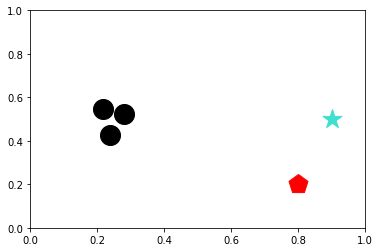

In [14]:
def plot_scatterplot():
    for i in  Robotx._registry:
        plt.scatter(i.betax, i.betay, s = 400, marker = 'o', color = 'black')
        
    plt.scatter(T.x, T.y, s = 400, marker = '*', color = 'turquoise')
    plt.scatter(O.x, O.y, s = 400, marker = 'p', color = 'red')

    plt.axis([0, 1, 0, 1])

    plt.show() 

plot_scatterplot()

# initialization of sound parameters


# we need 'append' to create such a list!

l = []
for x in range(11):
    value = AudioSegment.from_file("notes_/tC.mp3")
    l.append(value)
for i in range(11):
    print(l[i])
    
for k in Robotx._registry:
    print(k.position)
    
for k in Robotx._registry:
    print(l[k.position])

# audio block #1

# audio 1

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_1.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


In [15]:
for r in Robotx._registry:
    if (r.delta < 0.5):
        print(f"{r.name} {r.delta:.2f} achtung!") # and start from this point to build the reshuffle section

R0 0.38 achtung!
R1 0.33 achtung!
R2 0.32 achtung!


In [16]:
WholeMatrix = []

smallMatrix1 = np.array([[1, 2], [0, 1]])
smallMatrix2 = np.array([[1, 0], [0, 1]])
smallMatrix3 = np.array([[0, 0], [0, 0]])
smallMatrix4 = np.array([[0, 0], [0, 0]])

NullMatrix = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in smallMatrix1]))

print('\n')
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in smallMatrix4]))
print('\n')

WholeMatrix = np.block([[smallMatrix1, smallMatrix3], [smallMatrix2, smallMatrix4]])

# matrixDiag = []
# matrixDiag = [[1, 2], [3, 4]]
# print(matrixDiag)

# print(WholeMatrix)

print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in WholeMatrix]))

   1   2
   0   1


   0   0
   0   0


   1   2   0   0
   0   1   0   0
   1   0   0   0
   0   1   0   0


In [17]:

w, h = 4, 4
matrixRobot = [[0 for x in range(w)] for y in range(h)]

print(matrixRobot)

matrixRobot[3]

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


[0, 0, 0, 0]

In [18]:
# WE MAKE THIS before the reshuffling

for Ri in Robotx._registry:
    print("submatrix relative to", Ri.name) # CORRECT "Ri_matrix" # Ri.position
    print("index: ", Ri.position - 1)
    speed = 1 # we are considering a constant speed for now, for all robots, along all directions, except zeta
    acceleration = 0 # same as above
    # the zeta component is not here: there are zeros in correspondence of z information
    # we suppose constant charge use
    charge = 0.5

    Ri.matrix = np.array([[round(Ri.betax, 1), speed, acceleration, round(Ri.delta, 1)], [round(Ri.betay, 1), speed, acceleration, charge],[0, 0, 0, 0], ["on", "on", "normal", 0]])
    print('\n')
    
    #print(Ri.matrix)
    
    print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in Ri.matrix]))
    
    # print("index check:", Ri.position)
    # create a label
    if (Ri.position == 1):
        #print("bla")
        R1_matrix = Ri.matrix
    if (Ri.position == 2):
        #print("blu")
        R2_matrix = Ri.matrix
    if (Ri.position == 3):
        print("gulp")
        R3_matrix = Ri.matrix
        
    print('\n')

#print(R1_matrix)
#print(R2_matrix)
#print(R3_matrix)
#print(NullMatrix)



submatrix relative to R0
index:  0


0.3 1   0   0.4 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R1
index:  1


0.2 1   0   0.3 
0.4 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R2
index:  2


0.2 1   0   0.3 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   
gulp




In [19]:
# with only the diagonal blocks, the whole matrix is a block-diagonal matrix:

In [20]:
#print(R1_matrix, '\n', R2_matrix, R3_matrix)

In [21]:
WholeMatrixRobot = np.block([[R1_matrix, NullMatrix, NullMatrix], [NullMatrix, R2_matrix, NullMatrix], [NullMatrix, NullMatrix, R3_matrix]])

print('\n'.join([''.join(['{:8}'.format(item) for item in row])
                 for row in WholeMatrixRobot]))

0.3     1       0       0.4     0       0       0       0       0       0       0       0       
0.5     1       0       0.5     0       0       0       0       0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
on      on      normal  0       0       0       0       0       0       0       0       0       
0       0       0       0       0.2     1       0       0.3     0       0       0       0       
0       0       0       0       0.4     1       0       0.5     0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
0       0       0       0       on      on      normal  0       0       0       0       0       
0       0       0       0       0       0       0       0       0.2     1       0       0.3     
0       0       0       0       0       0       0       0       0.5     1       0       0.5     
0       0       0       0     

In [22]:
# Reshuffling ----------------------------------------------------------------------------

In [23]:
# I'm adding this one as the only non-quantum thing:

result = all(i.delta < 0.8 for i in Robotx._registry)
  
# Printing result
print("Do all the robots have a reward lower than 0.8? : " + str(result))

# if True: reshuffle positions
# if False: do nothing

if result == True:
    flag = True
    while flag:
        flag = False
        for i in Robotx._registry:
            i.alphax = np.random.uniform(0,0.9)
            i.betax = 1 - i.alphax
            i.alphay = np.random.uniform(0,0.9)
            i.betay = 1 - i.alphay
            if (i.betax - O.x <= 0.2 and i.betay - O.y <= 0.2 <= 0.2):
                flag = True

Do all the robots have a reward lower than 0.8? : True


In [24]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.position}")

R0 0.26 0.51 0.62 1
R1 0.35 0.55 0.67 2
R2 0.47 0.87 0.68 3


In [25]:
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"{i.name} {i.delta:.2f}")

R0 0.36
R1 0.45
R2 0.43


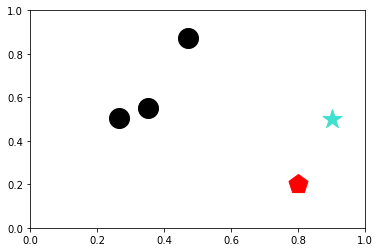

In [26]:
plot_scatterplot()

In [27]:
# MATRIX after the reshuffling

In [30]:
for Ri in Robotx._registry:
    print("submatrix relative to", Ri.name) # CORRECT "Ri_matrix" # Ri.position
    print("index: ", Ri.position - 1)
    speed = 1 # we are considering a constant speed for now, for all robots, along all directions, except zeta
    acceleration = 0 # same as above
    # the zeta component is not here: there are zeros in correspondence of z information
    # we suppose constant charge use
    charge = 0.5

    Ri.matrix = np.array([[round(Ri.betax, 1), speed, acceleration, round(Ri.delta, 1)], [round(Ri.betay, 1), speed, acceleration, charge],[0, 0, 0, 0], ["on", "on", "normal", 0]])
    print('\n')
    
    #print(Ri.matrix)
    
    print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in Ri.matrix]))
    
    # print("index check:", Ri.position)
    # create a label
    if (Ri.position == 1):
        #print("bla")
        R1_matrix = Ri.matrix
    if (Ri.position == 2):
        #print("blu")
        R2_matrix = Ri.matrix
    if (Ri.position == 3):
        print("gulp")
        R3_matrix = Ri.matrix
        
    print('\n')

#print(R1_matrix)
#print(R2_matrix)
#print(R3_matrix)
#print(NullMatrix)

submatrix relative to R0
index:  0


0.3 1   0   0.4 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R1
index:  1


0.4 1   0   0.5 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R2
index:  2


0.5 1   0   0.4 
0.9 1   0   0.5 
0   0   0   0   
on  on  normal0   
gulp




In [31]:
WholeMatrixRobot = np.block([[R1_matrix, NullMatrix, NullMatrix], [NullMatrix, R2_matrix, NullMatrix], [NullMatrix, NullMatrix, R3_matrix]])

print('\n'.join([''.join(['{:8}'.format(item) for item in row])
                 for row in WholeMatrixRobot]))



0.3     1       0       0.4     0       0       0       0       0       0       0       0       
0.5     1       0       0.5     0       0       0       0       0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
on      on      normal  0       0       0       0       0       0       0       0       0       
0       0       0       0       0.4     1       0       0.5     0       0       0       0       
0       0       0       0       0.5     1       0       0.5     0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
0       0       0       0       on      on      normal  0       0       0       0       0       
0       0       0       0       0       0       0       0       0.5     1       0       0.4     
0       0       0       0       0       0       0       0       0.9     1       0       0.5     
0       0       0       0     

# audio block #2


# audio 2

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_2.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 

# I'm trying to use the same code, but saving the file as another one.

In [32]:
# Quantum circuit construction ------------------------------------------------------------------

In [33]:
q = QuantumRegister(5, 'q') # qubits # changed to 9, formerly 15
m2 = ClassicalRegister(1, 'c1') # classical bits (separated is better)
m3 = ClassicalRegister(1, 'c2')
m4 = ClassicalRegister(1, 'c3')

qc3 = QuantumCircuit(q, m2, m3, m4) # to reach the target
qc4 = QuantumCircuit(q, m2, m3, m4) # to get back to the nest

In [34]:
# Which robot should enter the gate? -----------------------------------------------------------

In [35]:
def print_formatted_vector(*args):
    for vector in args:
        print("[" + "".join(f"{val:.2f} " for val in vector).strip() + "]")

In [36]:
# in case of ties on delta score, the max() function outputs the first maximum item it processes 
closest_robot = max(Robotx._registry, key=attrgetter('delta'))
print(f"Closest robot to the target: {closest_robot.name} {closest_robot.betax:.2f} {closest_robot.betay:.2f} {closest_robot.delta:.2f}")

# and then it enters the gate
vector0 = [closest_robot.alphax, closest_robot.betax]
vector1 = [closest_robot.alphay, closest_robot.betay]
vector3 = [closest_robot.gamma, closest_robot.delta]

normalized_v0 = vector0/np.linalg.norm(vector0)
normalized_v1 = vector1/np.linalg.norm(vector1)
normalized_v3 = vector3/np.linalg.norm(vector3)

print_formatted_vector(vector0, vector1, vector3)
print_formatted_vector(normalized_v0, normalized_v1, normalized_v3)

Closest robot to the target: R1 0.35 0.55 0.45
[0.65 0.35]
[0.45 0.55]
[0.55 0.45]
[0.88 0.48]
[0.63 0.77]
[0.77 0.63]


In [37]:
# Setting up |q_0> ------------------------------------------------------------------------------

In [38]:
# direct initialization with amplitudes vector
qc3.initialize(normalized_v0, q[0])
qc3.initialize(normalized_v1, q[1])
qc3.initialize(normalized_v3, q[2])

In [39]:
# this is the core code, and it is unchanged across time

qc3.barrier(q)
qc3.ccx(q[0],q[1],q[3])
qc3.ccx(q[0],q[1],q[4])

qc3.reset(q[3])
qc3.reset(q[4])

qc3.ccx(q[0],q[2],q[3]) 
qc3.ccx(q[1],q[2],q[4])

qc3.x(q[2])

qc3.ch(q[2],q[3])
qc3.ch(q[2],q[4])

qc3.x(q[2])

qc3.barrier(q)

# perform measurements and store them in classical bits

qc3.measure(q[2],m2[0])
qc3.measure(q[3],m3[0])
qc3.measure(q[4],m4[0])

# visualization of the ciruit

# qc3.draw(fold=-1, output="mpl")
# plt.show();

print(qc3)

      ┌─────────────────────────────┐ ░                                    »
 q_0: ┤ Initialize(0.87809,0.47849) ├─░───■────■─────────■─────────────────»
      ├─────────────────────────────┤ ░   │    │         │                 »
 q_1: ┤ Initialize(0.63449,0.77293) ├─░───■────■─────────┼────■────────────»
      ├─────────────────────────────┤ ░   │    │         │    │  ┌───┐     »
 q_2: ┤ Initialize(0.77332,0.63402) ├─░───┼────┼─────────■────■──┤ X ├──■──»
      └─────────────────────────────┘ ░ ┌─┴─┐  │       ┌─┴─┐  │  └───┘┌─┴─┐»
 q_3: ────────────────────────────────░─┤ X ├──┼───|0>─┤ X ├──┼───────┤ H ├»
                                      ░ └───┘┌─┴─┐     └───┘┌─┴─┐     └───┘»
 q_4: ────────────────────────────────░──────┤ X ├─|0>──────┤ X ├──────────»
                                      ░      └───┘          └───┘          »
c1: 1/═════════════════════════════════════════════════════════════════════»
                                                                           »

counts:  {'1 0 1': 187, '0 1 1': 39, '1 1 1': 55, '0 0 1': 119, '1 1 0': 162, '1 0 0': 146, '0 1 0': 171, '0 0 0': 145}


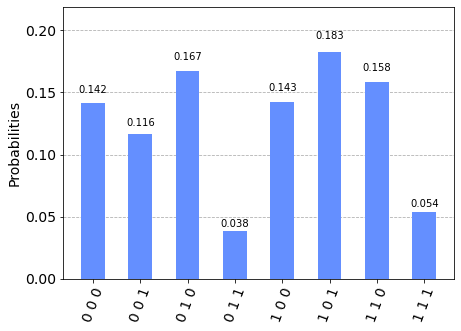

In [40]:
aer_sim = Aer.get_backend("aer_simulator")
transpiled_qc = transpile(qc3, aer_sim)
result = aer_sim.run(transpiled_qc).result()

counts = result.get_counts()
print("counts: ", counts)

plot_histogram(result.get_counts())

In [41]:
def eval_outcome(most_prob_dict, n_outcome):
    mapped_weights0 = list(map(lambda res: int(res[n_outcome*2])*most_prob_dict[res], most_prob_dict))
    return sum(mapped_weights0)/sum(most_prob_dict.values())

In [42]:
num_most_prob_states = 4

# https://docs.python.org/3/library/heapq.html: 
#
# heapq.nlargest(n, iterable, key=None) returns a list with the n largest element of iterable
#
most_prob_dict = dict(heapq.nlargest(num_most_prob_states, counts.items(), key=itemgetter(1)))
print(f"{num_most_prob_states} most probable states: {most_prob_dict}")

outcome0, outcome1 = eval_outcome(most_prob_dict, 0), eval_outcome(most_prob_dict, 1)

print(f"outcome0: {outcome0:.2f}\noutcome1: {outcome1:.2f}")


4 most probable states: {'1 0 1': 187, '0 1 0': 171, '1 1 0': 162, '1 0 0': 146}
outcome0: 0.74
outcome1: 0.50


In [43]:
# Setting new positions after the gate ---------------------------------------------------------------

In [44]:
for i in Robotx._registry:
    print(f"{i.name} {i.betax:.2f} {i.betay:.2f}")
    if (i.delta != closest_robot.delta or all(i.delta == j.delta for j in Robotx._registry)): # excluding the robot that entered the gate
        # CHANGE: but taking into account the case where all robots have the same reward!!!
        # for z
        #i.betaz = outcome0
        # the lower this value, the closer the robot to the 0, the higher alphaz
        #i.alphaz = round(1 - i.betaz, 3)
        # for y
        i.betay = outcome0 # changed this
        i.alphay = 1 - i.betay
        # for x
        i.betax = outcome1 # changed this
        i.alphax = 1 - i.betax

R0 0.26 0.51
R1 0.35 0.55
R2 0.47 0.87


In [45]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.position}")

R0 0.50 0.74 0.64 1
R1 0.35 0.55 0.55 2
R2 0.50 0.74 0.57 3


In [46]:
# former rewards 
for i in  Robotx._registry:
    print(f"before the gate: {i.name} {i.delta:.2f}")

before the gate: R0 0.36
before the gate: R1 0.45
before the gate: R2 0.43


In [47]:
# new rewards
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"after the gate: {i.name} {i.delta:.2f}")

after the gate: R0 0.53
after the gate: R1 0.45
after the gate: R2 0.53


In [48]:
# MATRIX after the computation of the gate

In [49]:
# IF we consider only the most successful robot entering the gate, then the off-diagonal terms are all equal

In [73]:
# print("Because we let only the most successful robot enter the gate, then the off-diagonal blocks will be the same")
print('\n')
print("Off-diagonal block: ", closest_robot.name, "* Rj")
OffDiag = np.array([[round(closest_robot.betax, 1), round(closest_robot.betay, 1), 0, round(closest_robot.delta, 1)],
           [round(closest_robot.alphax, 1), round(closest_robot.alphay, 1), 0, round(closest_robot.gamma, 1)],
           [round(outcome1, 1), round(outcome0, 1), 0, 0], [round(1 - outcome1, 1), round(1 - outcome0, 1), 0, 0]])
           
           # (check normalization from the path-planning code!)
print(OffDiag)

# ...where we put zeros in correspondence of zeta



Off-diagonal block:  R1 * Rj
[[0.4 0.5 0.  0.5]
 [0.6 0.5 0.  0.5]
 [0.5 0.7 0.  0. ]
 [0.5 0.3 0.  0. ]]


In [74]:
# Updating the diagonal blocks:

for Ri in Robotx._registry:
    print("submatrix relative to", Ri.name) # CORRECT "Ri_matrix" # Ri.position
    print("index: ", Ri.position - 1)
    speed = 1 # we are considering a constant speed for now, for all robots, along all directions, except zeta
    acceleration = 0 # same as above
    # the zeta component is not here: there are zeros in correspondence of z information
    # we suppose constant charge use
    charge = 0.5

    Ri.matrix = np.array([[round(Ri.betax, 1), speed, acceleration, round(Ri.delta, 1)], [round(Ri.betay, 1), speed, acceleration, charge],[0, 0, 0, 0], ["on", "on", "normal", 0]])
    print('\n')
    
    #print(Ri.matrix)
    
    print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in Ri.matrix]))
    
    # print("index check:", Ri.position)
    # create a label
    if (Ri.position == 1):
        R1_matrix = Ri.matrix
    if (Ri.position == 2):
        R2_matrix = Ri.matrix
    if (Ri.position == 3):
        R3_matrix = Ri.matrix
        
    print('\n')

#print(R1_matrix)
#print(R2_matrix)
#print(R3_matrix)
#print(NullMatrix)

submatrix relative to R0
index:  0


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R1
index:  1


0.4 1   0   0.5 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R2
index:  2


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   




In [75]:
print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in OffDiag]))

print('\n')

print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in R1_matrix]))
print('\n')

print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in R2_matrix]))
print('\n')

print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in R3_matrix]))


 0.4 0.5 0.0 0.5
 0.6 0.5 0.0 0.5
 0.5 0.7 0.0 0.0
 0.5 0.3 0.0 0.0


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   


0.4 1   0   0.5 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   


In [76]:
# with the off-diagonal blocks:
WholeMatrixRobot = np.block([[R1_matrix, OffDiag, OffDiag], [OffDiag, R2_matrix, OffDiag], [OffDiag, OffDiag, R3_matrix]])

print('\n'.join([''.join(['{:8}'.format(item) for item in row])
                 for row in WholeMatrixRobot]))


0.5     1       0       0.5     0.4     0.5     0.0     0.5     0.4     0.5     0.0     0.5     
0.7     1       0       0.5     0.6     0.5     0.0     0.5     0.6     0.5     0.0     0.5     
0       0       0       0       0.5     0.7     0.0     0.0     0.5     0.7     0.0     0.0     
on      on      normal  0       0.5     0.3     0.0     0.0     0.5     0.3     0.0     0.0     
0.4     0.5     0.0     0.5     0.4     1       0       0.5     0.4     0.5     0.0     0.5     
0.6     0.5     0.0     0.5     0.5     1       0       0.5     0.6     0.5     0.0     0.5     
0.5     0.7     0.0     0.0     0       0       0       0       0.5     0.7     0.0     0.0     
0.5     0.3     0.0     0.0     on      on      normal  0       0.5     0.3     0.0     0.0     
0.4     0.5     0.0     0.5     0.4     0.5     0.0     0.5     0.5     1       0       0.5     
0.6     0.5     0.0     0.5     0.6     0.5     0.0     0.5     0.7     1       0       0.5     
0.5     0.7     0.0     0.0   

# audio block #3

# audio 3

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_3.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


In [ ]:
# Reach the most successful robot -------------------------------------------------------

In [ ]:
# not for now

for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = (1 - i.delta, 3)
    
max_attr_ = max(Robotx._registry, key=attrgetter('delta'))
print(f"max_attr_.delta: {max_attr_.delta:.2f}")

for i in Robotx._registry:
    if (i.delta == max_attr_.delta):
        print(f"Most successful robot: {i.name} {i.betax:.2f} {i.betay:.2f} {i.delta:.2f}") # and then it enters the gate

for j in Robotx._registry:
    # to get other robots following it:
    if (j != max_attr_): # changed here
        flag = True
        while flag:
            flag = False
            j.alphax = max_attr_.alphax + np.random.uniform(0,0.01)
            j.betax = 1 - j.alphax
            j.alphay = max_attr_.alphay + np.random.uniform(0,0.01)
            j.betay = 1 - j.alphay
            if (j.betax - O.x <= 0.2 and j.betay - O.y <= 0.2):
                flag = True
                   
# recalculate the rewards here:

for k in  Robotx._registry: # recalculate the rewards
    k.delta = reward(T, k.betax, k.betay)
    k.gamma = 1 - k.delta
    print(f"{k.name} {k.delta:.2f}")

In [ ]:
for i in  Robotx._registry: # recalculate the rewards
    i.delta = reward(T, i.betax, i.betay)
    i.gamma = 1 - i.delta
    print(f"{i.name} {i.delta:.2f}")

In [ ]:
for k in Robotx._registry:
    print(f"{k.name} {k.betax:.2f} {k.betay:.2f} {k.gamma:.2f} {k.delta:.2f} {k.position}")

In [ ]:
plot_scatterplot()

# audio block #4

# audio 4

# we can define "audio" as an attribute... no, better not.

audio = []

for x in range(11): # it should be between 1 and 11 
    valuex = AudioSegment.from_file("notes_/tC.mp3")
    audio.append(valuex)
for i in range(11):
    print(audio[i]) # at this stage, they are supposed to all give tC.mp3

for i in Robotx._registry:
    if (i.betax == 0):
        if (i.betay == 0.5):
            valuex = AudioSegment.from_file("notes_/tC.mp3") # i.audio
            audio.append(valuex)
            print("tC")
    if (i.betax > 0 and i.betax <= 0.17):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tB.mp3")
            audio.append(valuex)
            print("tB")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tC#.mp3")
            audio.append(valuex)
            print("tC#")
    if (i.betax > 0.17 and i.betax <= 0.3):
        if (i.betay < 0.5): # if (R1.betay >= 0.17 and R1.betay < 0.3):
            valuex = AudioSegment.from_file("notes_/tA#.mp3")
            audio.append(valuex)
            print("tA#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tD.mp3")
            audio.append(valuex)
            print("tD")
    if (i.betax > 0.3 and i.betax <= 0.5):
        if (i.betay < 0.5): # (R1.betay == 1):
            valuex = AudioSegment.from_file("notes_/tD#.mp3")
            audio.append(valuex)
            print("tD#")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tA.mp3")
            audio.append(valuex)
            print("tA")
    if (i.betax > 0.5 and i.betax <= 0.64):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tE.mp3")
            audio.append(valuex)
            print("tE")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG#.mp3")
            audio.append(valuex)
            print("tG#")
    if (i.betax > 0.64 and i.betax <= 0.84):
        if (i.betay < 0.5):
            valuex = AudioSegment.from_file("notes_/tF.mp3")
            audio.append(valuex)
            print("tF")
        if (i.betay >= 0.5):
            valuex = AudioSegment.from_file("notes_/tG.mp3")
            audio.append(valuex)
            print("tG")
    if (i.betax > 0.84 and i.betax <= 1):
        #if (R1.betay == 0.5):
        valuex = AudioSegment.from_file("notes_/tF#.mp3")
        audio.append(valuex)
        print("tF#")
        
        
        
for i in Robotx._registry:
    print(audio[i.position]) # at this stage, they are supposed to all give tC.mp3
    

    

mix = []

for s in range(11): # it should be between 1 and 11 
    #values = (audio[s].overlay(audio[s+1])).overlay(audio[s+3])
    
    # is there a more synthetic way to write this??
    values = audio[s].overlay(audio[s+1])
    values2 = values.overlay(audio[s+2])
    values3 = values2.overlay(audio[s+3])
    values4 = values3.overlay(audio[s+4])
    values5 = values4.overlay(audio[s+5])
    values6 = values5.overlay(audio[s+6])
    values7 = values6.overlay(audio[s+7])
    values8 = values7.overlay(audio[s+8])
    values9 = values8.overlay(audio[s+9])
    mix.append(values9)
    print(mix[s])

mix[10].export("notes_/10_robot_sound/mixed_time_4.mp3", format='mp3') # export mixed  audio file
play(mix[10]) 


In [ ]:
# After the arrival

In [78]:
for Ri in Robotx._registry:
    print("submatrix relative to", Ri.name) # CORRECT "Ri_matrix" # Ri.position
    print("index: ", Ri.position - 1)
    speed = 1 # we are considering a constant speed for now, for all robots, along all directions, except zeta
    acceleration = 0 # same as above
    # the zeta component is not here: there are zeros in correspondence of z information
    # we suppose constant charge use
    charge = 0.5

    Ri.matrix = np.array([[round(Ri.betax, 1), speed, acceleration, round(Ri.delta, 1)], [round(Ri.betay, 1), speed, acceleration, charge],[0, 0, 0, 0], ["on", "on", "normal", 0]])
    print('\n')
    
    #print(Ri.matrix)
    
    print('\n'.join([''.join(['{:4}'.format(item) for item in row])
                 for row in Ri.matrix]))
    
    # print("index check:", Ri.position)
    # create a label
    if (Ri.position == 1):
        #print("bla")
        R1_matrix = Ri.matrix
    if (Ri.position == 2):
        #print("blu")
        R2_matrix = Ri.matrix
    if (Ri.position == 3):
        print("gulp")
        R3_matrix = Ri.matrix
        
    print('\n')

#print(R1_matrix)
#print(R2_matrix)
#print(R3_matrix)
#print(NullMatrix)


submatrix relative to R0
index:  0


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R1
index:  1


0.4 1   0   0.5 
0.5 1   0   0.5 
0   0   0   0   
on  on  normal0   


submatrix relative to R2
index:  2


0.5 1   0   0.5 
0.7 1   0   0.5 
0   0   0   0   
on  on  normal0   
gulp




In [79]:
WholeMatrixRobot = np.block([[R1_matrix, NullMatrix, NullMatrix], [NullMatrix, R2_matrix, NullMatrix], [NullMatrix, NullMatrix, R3_matrix]])

print('\n'.join([''.join(['{:8}'.format(item) for item in row])
                 for row in WholeMatrixRobot]))

0.5     1       0       0.5     0       0       0       0       0       0       0       0       
0.7     1       0       0.5     0       0       0       0       0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
on      on      normal  0       0       0       0       0       0       0       0       0       
0       0       0       0       0.4     1       0       0.5     0       0       0       0       
0       0       0       0       0.5     1       0       0.5     0       0       0       0       
0       0       0       0       0       0       0       0       0       0       0       0       
0       0       0       0       on      on      normal  0       0       0       0       0       
0       0       0       0       0       0       0       0       0.5     1       0       0.5     
0       0       0       0       0       0       0       0       0.7     1       0       0.5     
0       0       0       0     